# Seaborn
eaborn은 matplotlib을 기반으로 다양한 색상 테마와 통계용 챠트 등의 기능을 추가한 시각화 패키지이다. 당연히 matplotlib 패키지에 의존하며 통계 기능의 경우에는 statsmodels 패키지에 의존한다.

seaborn에서 제공하는 플롯의 종류는 다음과 같다.

- 분포 플롯 (distribution plot)
- 회귀 분석 플롯 (regression plot)
- 카테고리 플롯 (categorical plot)
- 행렬 플롯 (matrix plot)
- 시계열 플롯 (time series plot)

[seaborn에 대한 자세한 내용](http://stanford.edu/~mwaskom/software/seaborn/index.html)

## Purpose
matplotlib를 기반으로 기능이 확장된 seaborn을 실제 dataset을 활용하여 시각화하여 사용법에 익숙해지도록 한다.

## Index

1. 데이터의 평균,표준편차 시각화 : boxplot, swamplot
2. 데이터의 각 feature간 correlation 시각화 : implot, keplot, displot ( positive correlation, negative correlation )

## 1. 평균(mean),표준편차(standard devication) 시각화 using boxplot, swarmplot

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
% matplotlib inline

In [6]:
x = np.linspace(0,14,100)
y1 = np.sin(x)
y2 = 2 * np.sin(x+0.5)
y3 = 3 * np.sin(x+1.0)
y4 = 4 * np.sin(x+1.5)

### matplitlib

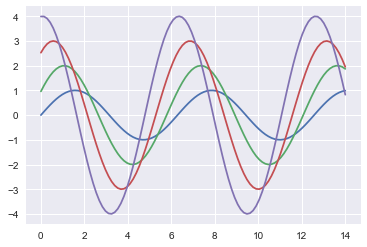

In [7]:
plt.figure()
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

### seaborn

sns.set_style()을 통해 seaborn의 style을 아래와 같이 지정할 수 있다.
- whitegrid
- dark
- ticks

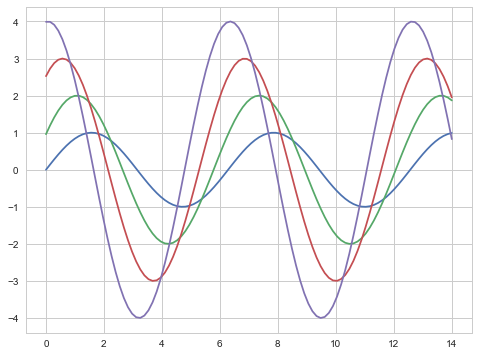

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

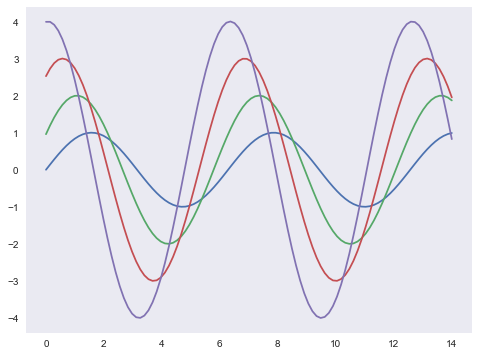

In [10]:
sns.set_style('dark')
plt.figure(figsize=(8,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

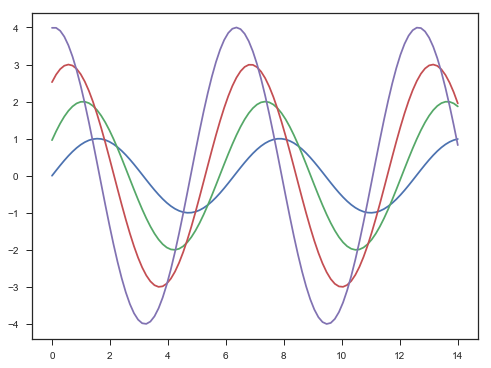

In [12]:
sns.set_style('ticks')
plt.figure(figsize=(8,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

sns.despine() : 우측,상단의 테두리를 제거

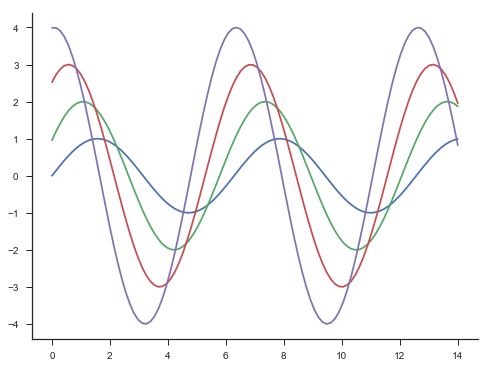

In [14]:
sns.set_style('ticks')
plt.figure(figsize=(8,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
sns.despine()
plt.show()

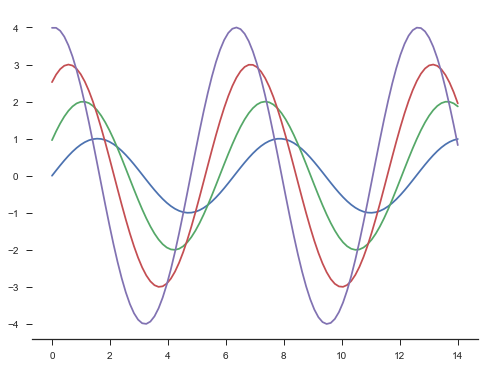

In [15]:
sns.set_style('ticks')
plt.figure(figsize=(8,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
sns.despine(left=True)
plt.show()

### data load from seaborn
- tips dataset

In [16]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### tips dataframe
- 7개의 feature를 가진 data vector
- 3개(total_bill,top,size)의 numeric type feature
- 4개(sex,smoker,day,time)의 categorical type feature

pandas 라이브러리의 describe()를 활용하여 numeric feature의 특징을 파악 할 수 있다.

In [20]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Data-Visualization using seaborn

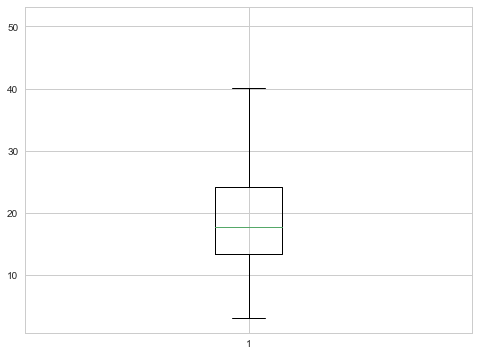

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.boxplot(tips['total_bill'])
plt.show()

## Boxplot을 사용하여 데이터의 분포를 평균,표준편차의 관점으로 이해할 수 있다.

### Data-visualization 1 : 요일별 총 이용료 

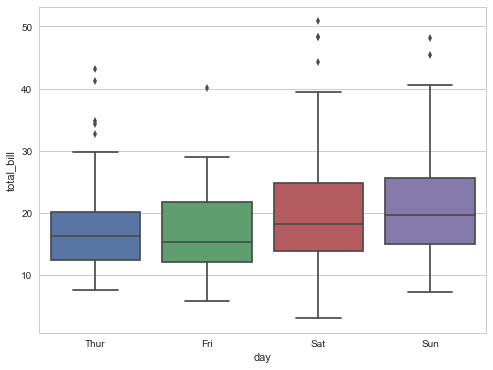

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day',y='total_bill',data=tips)
plt.show()

### sns.boxplot()
- x : x-axis feature
- y : y-axis feature
- hue : 동시에 비교하고 싶은 feature
- paletter : 비교의 대상이 되는 feature간의 색상구분

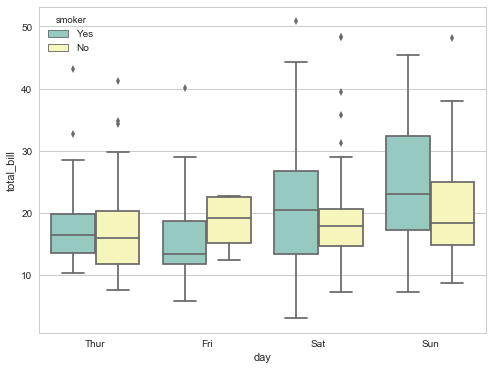

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day',y='total_bill',hue='smoker',palette='Set3',data=tips)
plt.show()

### Data-visualization 2 : 요일별 총 이용료를 흡연자/비흡연자간의 차이를 비교

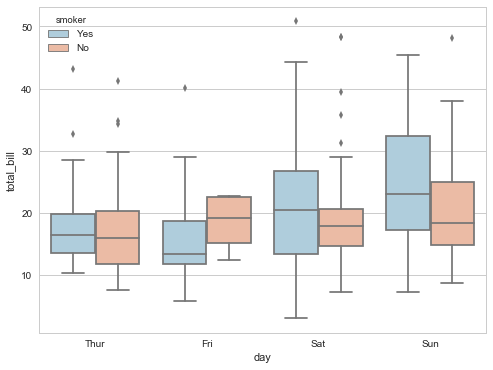

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day',y='total_bill',hue='smoker',palette='RdBu_r',data=tips)
plt.show()

### Data-visualization 3 : 요일별 총 이용료를 점심/저녁과 차이가 있는지를 비교

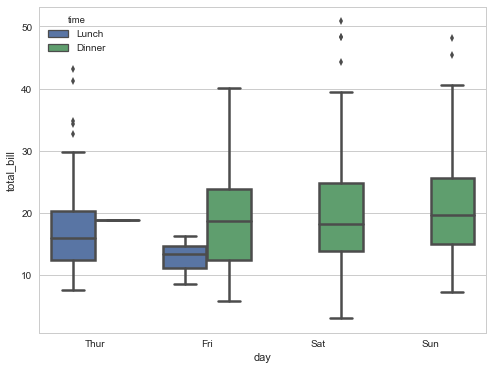

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day',y='total_bill',hue='time',data=tips,linewidth=2.5)
plt.show()

### Data-visualization 4 : 시간(저녁/점심)별 팁(tip)

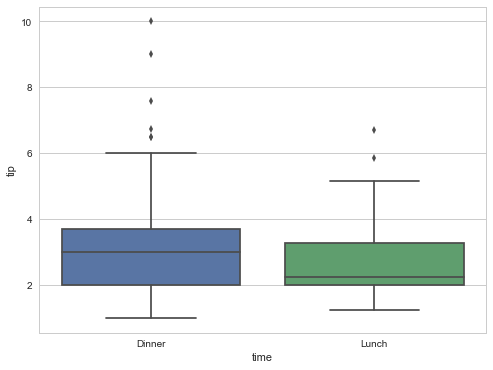

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x='time',y='tip',order=['Dinner','Lunch'],data=tips)
plt.show()

### sns.swarmplot()
- 데이터의 분포를 scattering 하여 boxplot과는 또 다른 관점으로 실제 데이터의 분포를 이해할 수 있다.

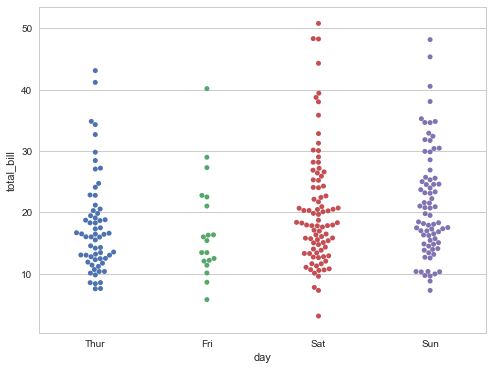

In [42]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='day',y='total_bill',data=tips)
plt.show()

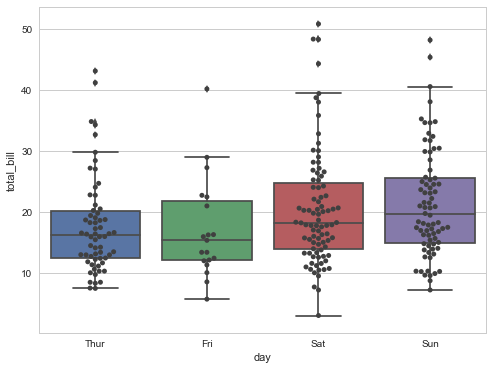

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='.25')
plt.show()

### Data-visualization 5 : 시간(점심/저녁), 성별,흡연여부에 따른 총 이용요금 비교

- sns.FacetGrid()를 통해 dataset을 'time' feature로 분할 한 뒤,
- 나누어진 dataset(D1,D2)를 x : sex, y: total_bill, hue : smoker 로써 boxplot

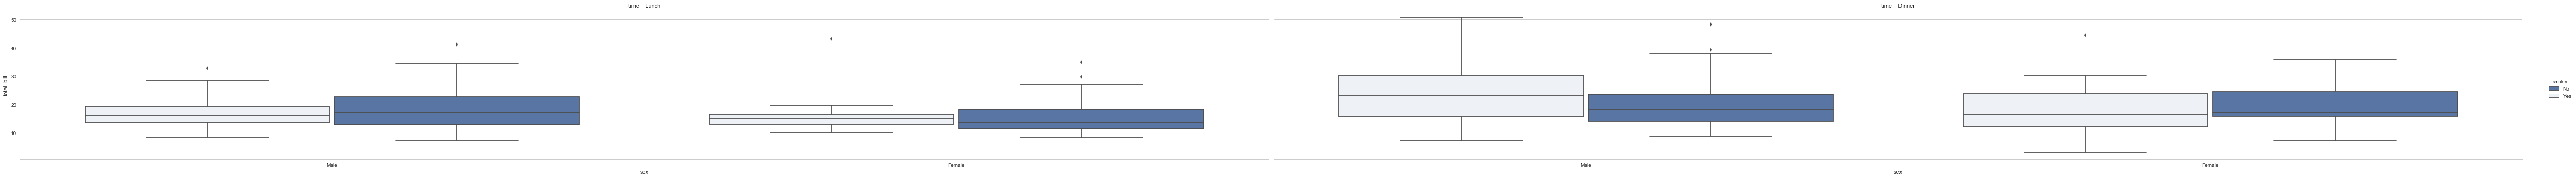

In [53]:
grid = sns.FacetGrid(tips,col='time',size=5,aspect=7)
grid.map(sns.boxplot,'sex','total_bill','smoker').despine(left=True).add_legend(title='smoker')
plt.show()

## 2. Attribute(Featrue)간의 correlation(상관관계) 분석 using implot, kdeplot, distplot

### Data-visualization 1 : 'total_bill', 'tip' 속성 간의 상관관계 분석
아래 데이터 분포를 통해, 서로 positive correlation 관계가 있음을 확인 할 수 있다.

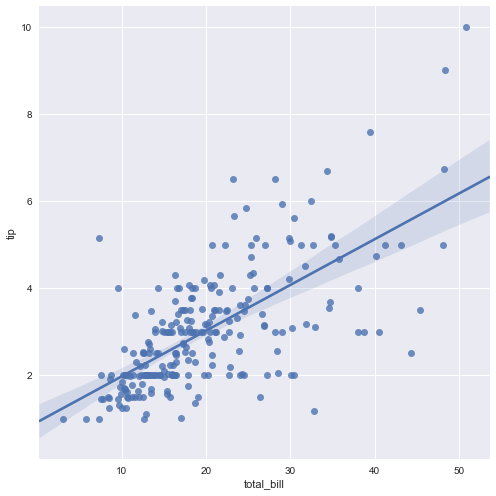

In [63]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill',y='tip',data=tips,size=7)
plt.show()

### Data-visualization 2 : 'total_bill', 'tip' 속성 간의 상관관계를 흡연자/비흡연자로 나누어 파악할 수 있다.

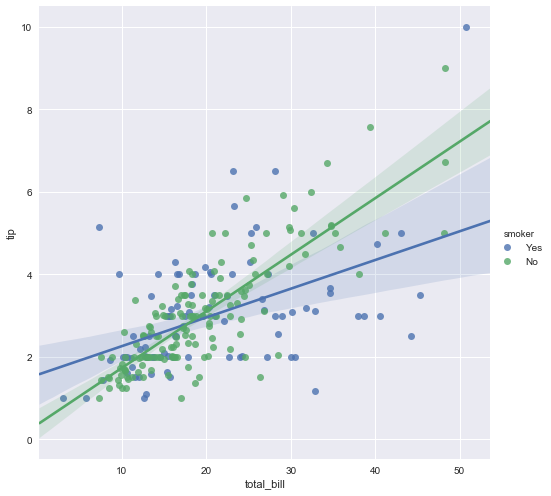

In [64]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips,size=7)
plt.show()

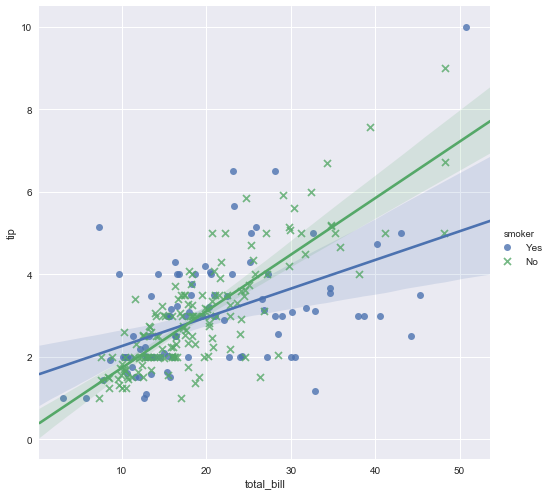

In [66]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill',y='tip',hue='smoker',markers=['o','x'],data=tips,size=7)
plt.show()

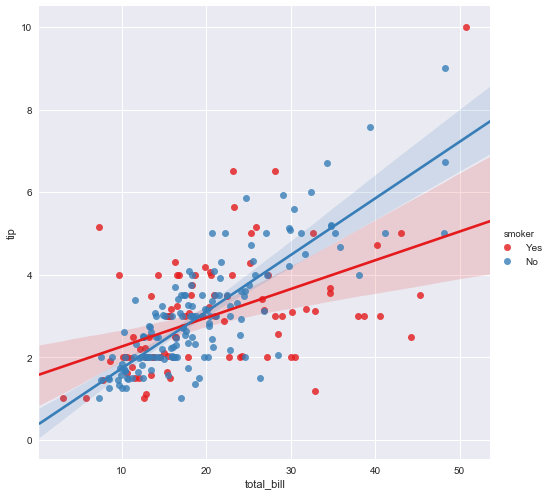

In [67]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill',y='tip',hue='smoker',palette='Set1',data=tips,size=7)
plt.show()

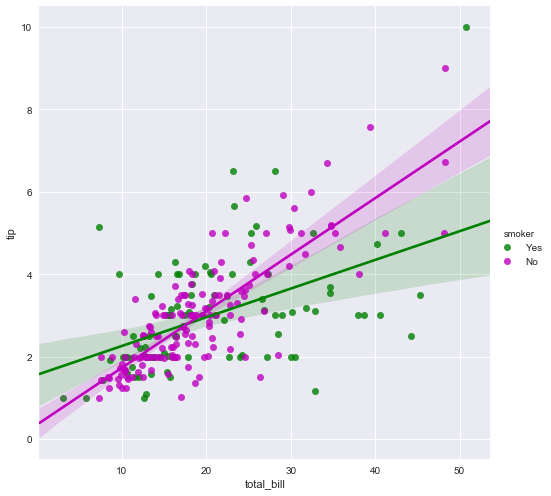

In [69]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill',y='tip',hue='smoker',palette=dict(Yes='g',No='m'),data=tips,size=7)
plt.show()

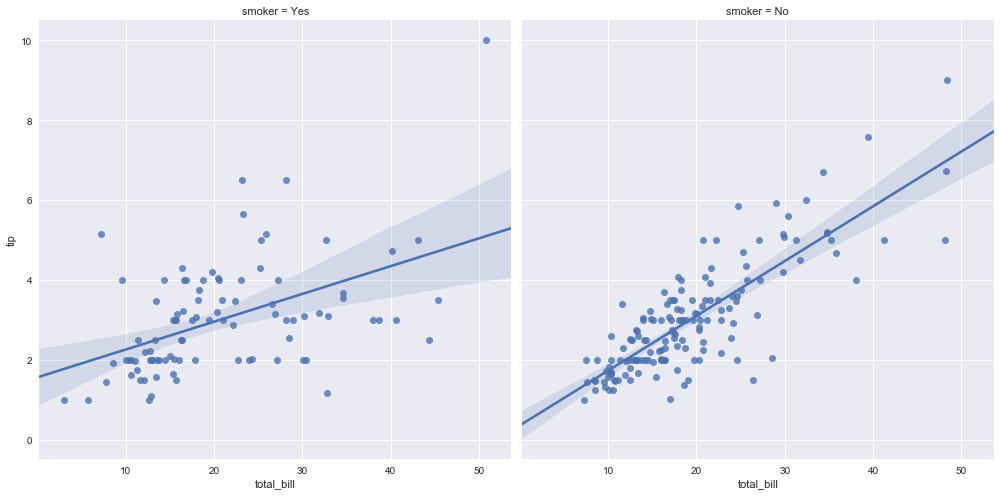

In [70]:
sns.lmplot(x='total_bill',y='tip',col='smoker',data=tips,size=7)
plt.show()

### correlation 상관관계가 존재하는 임의의 dataset 생성
공분산(co-variance)의 의미는? https://github.com/HyunSu-Jin/Statistics
![img2](img/img2.png)

- 값이 1에 가까워 지면 두 feature간 서로 강한 positive correlation 관계가 있다
- 값이 -1에 가까워 지면 두 feature간 서로 강한 negative correlation 관계가 있다.
- 값이 0이면 두 feature간 서로 correlation한 정도가 없다.

In [71]:
mean,cov = [0,2],[(1,.5),(.5,1)]
x ,y = np.random.multivariate_normal(mean,cov,size=50).T

### 두 feature간 correlation 관계가 있는지 시각화해보자!

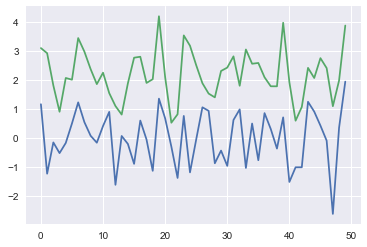

In [73]:
plt.figure()
plt.plot(x)
plt.plot(y)
plt.show()

### kdeplot
kdeplot은 discrete한 확률변수를 continuous하게 가정하여 plot하는 기능을 지녔다.<br/>
[자세한정보](http://seaborn.pydata.org/generated/seaborn.kdeplot.html)

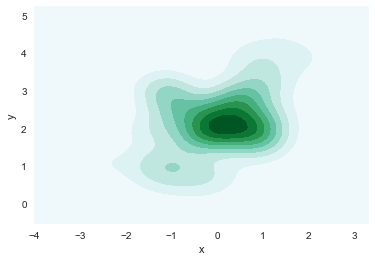

In [76]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
sns.kdeplot(x,y,shade=True)


- 위 그래프를 통해 사전에 설정된 평균 x :0 , y: 2 를 보임을 확인 할 수 있다.
- x 값이 증가하면 y값이 증가하고, x값이 감소하면 y값이 감소하는, *positive correlation* 상관관계가 있음을 확인할 수 있다.

### distplot
- histogram과 kdeplot을 동시에 보임.
- rug : 그래프 하단의 데이터의 밀도(density)를 표기

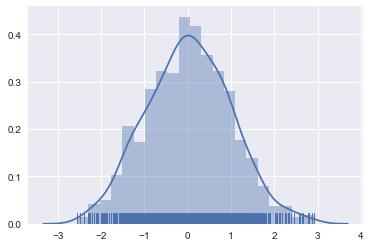

In [79]:
temp = np.random.randn(1000)
sns.distplot(temp,rug=True)
plt.show()

데이터의 분포가 평균(0),분산(1)에 가까움을 확인 할 수 있다.